In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense


In [2]:
df=pd.read_csv('loan_approval_dataset.csv')
df.head()

,Unnamed: 0,person_age,person_gender,person_education,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,previous_loan_defaults_on_file,loan_status,monthly_income
0,0,21.0,0,3,2,1000.0,1,11.14,0.08,1,0,1023.500000
1,1,21.0,0,3,2,2500.0,5,7.14,0.19,0,1,1079.250000
2,2,21.0,0,3,2,1600.0,5,14.74,0.13,0,1,1061.583333
3,3,21.0,0,0,2,4500.0,2,8.63,0.34,0,1,1092.750000
4,4,24.0,0,4,0,1750.0,1,10.99,0.12,0,1,1190.250000


In [3]:
df=df.drop(['Unnamed: 0'],axis=1)
df.head()

,person_age,person_gender,person_education,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,previous_loan_defaults_on_file,loan_status,monthly_income
0,21.0,0,3,2,1000.0,1,11.14,0.08,1,0,1023.500000
1,21.0,0,3,2,2500.0,5,7.14,0.19,0,1,1079.250000
2,21.0,0,3,2,1600.0,5,14.74,0.13,0,1,1061.583333
3,21.0,0,0,2,4500.0,2,8.63,0.34,0,1,1092.750000
4,24.0,0,4,0,1750.0,1,10.99,0.12,0,1,1190.250000


In [4]:
x=df[['person_age', 'person_gender', 'person_education',
       'person_home_ownership', 'loan_amnt', 'loan_intent', 'loan_int_rate',
       'loan_percent_income', 'previous_loan_defaults_on_file',
       'monthly_income']]
y=df['loan_status']

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE



scaler = StandardScaler()

# Fit and transform the data
x = scaler.fit_transform(x)

# Initialize SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Apply SMOTE to the training data
x, y = smote.fit_resample(x, y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
y_train = y_train.values.reshape(-1, 1)  # Convert to NumPy array and reshape
y_test = y_test.values.reshape(-1, 1)

In [7]:
print('x_train',x_train.shape)
print('x_test',x_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

x_train (44108, 10)
x_test (21726, 10)
y_train (44108, 1)
y_test (21726, 1)


In [8]:
from tensorflow.keras.regularizers import l2

model=tf.keras.Sequential({
    tf.keras.layers.Dense(64,activation='relu',input_shape=(x_train.shape[1],)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(1,activation='sigmoid')
    })

C:\Users\ndpar\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,329 (13.00 KB)

 Trainable params: 3,073 (12.00 KB)

 Non-trainable params: 256 (1.00 KB)

In [10]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [11]:
history=model.fit(x_train,y_train,validation_split=0.3,epochs=10,batch_size=20,verbose=1)

Epoch 1/10
1544/1544 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.8454 - loss: 0.3277 - val_accuracy: 0.8796 - val_loss: 0.2565
Epoch 2/10
1544/1544 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8805 - loss: 0.2554 - val_accuracy: 0.8827 - val_loss: 0.2506
Epoch 3/10
1544/1544 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8825 - loss: 0.2530 - val_accuracy: 0.8869 - val_loss: 0.2445
Epoch 4/10
1544/1544 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8850 - loss: 0.2441 - val_accuracy: 0.8868 - val_loss: 0.2412
Epoch 5/10
1544/1544 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.8873 - loss: 0.2445 - val_accuracy: 0.8878 - val_loss: 0.2375
Epoch 6/10
1544/1544 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8891 - loss: 0.2387 - val_accuracy: 0.8890 - val_loss: 0.2359
Epoch 7/10
1544/1544 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8899 - loss: 0.2330 - val_accuracy: 0.8885 - val_loss: 0.2335
Epoch 8/10
1544/1544 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8919 - loss: 0.2

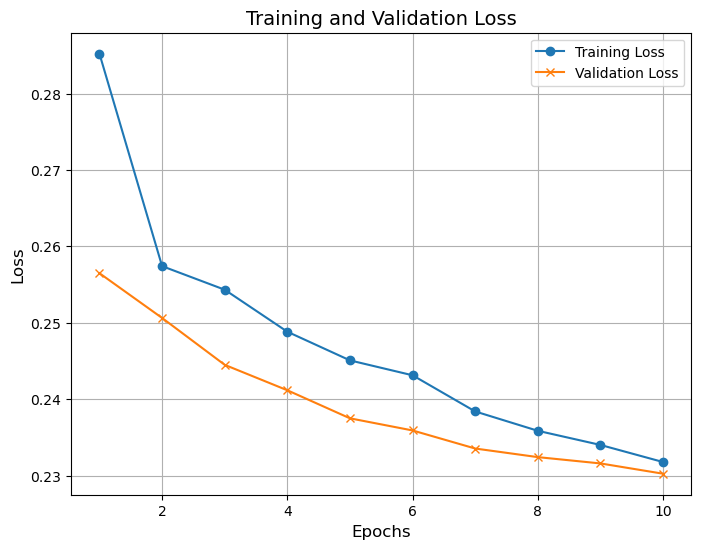

In [12]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(epochs, loss, label='Training Loss', marker='o')
plt.plot(epochs, val_loss, label='Validation Loss', marker='x')
plt.title('Training and Validation Loss', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend()
plt.grid()
plt.show()

679/679 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


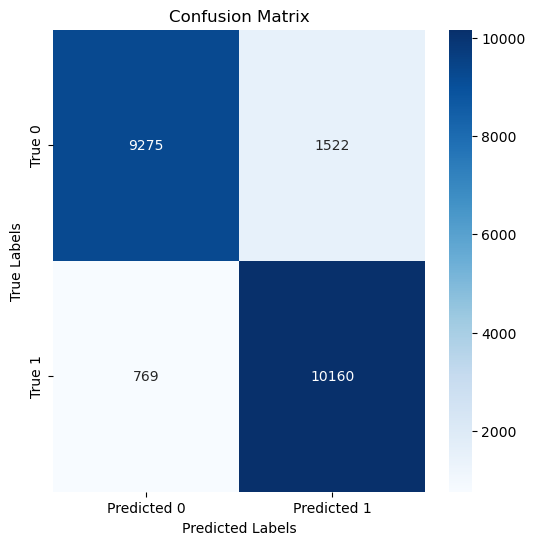

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_pred = model.predict(x_test)  # Make predictions on the test set

# Step 2: Convert predictions to binary class labels (0 or 1)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary labels (0 or 1)

# Step 3: Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)

# Step 4: Plot the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['True 0', 'True 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [14]:
cm

array([[ 9275,  1522],
       [  769, 10160]], dtype=int64)